In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [2]:
url = 'https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv'
data = pd.read_csv(url)
data.head()
data.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

### ex 1:   בלבד[ Age',Height,'Weight','Salary']קראו את הקובץ, השמיטו ערכים חסרים והציגו את 3 השורות הראשונות עם העמודות dtypes

In [18]:
data= data.dropna().reset_index(drop=True)
data[['Age','Height','Weight','Salary']].head(3)
data
data.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

### ex 2: תקנו את עמודת גובה לפורמט שיאפשר ניתוח והסקת מסקנה, הציגו שוב את['Age',Height,'Weight','Salary'] של הראשונות השורות 3


In [4]:
data['Height'] = data['Height'].astype('category').cat.codes
data[['Age','Height','Weight','Salary']].head(3)

,Age,Height,Weight,Salary
0,25.0,6,180.0,7730337.0
1,25.0,10,235.0,6796117.0
2,22.0,9,185.0,1148640.0


### ex 3:   צרו countplot ו pieplot עבור העמודה position ,וכיתבו איפה לדעתכם ניתן לראות את הדאטה בצורה ברורה יותר

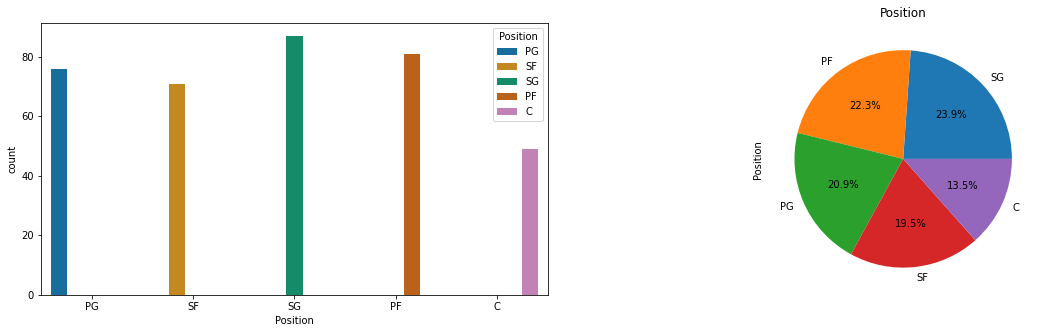

In [5]:
fig,axes = plt.subplots(figsize=(20,5),ncols=2)
sns.countplot(ax=axes[0],data=data,x=data['Position'],hue='Position',palette="colorblind")
data['Position'].value_counts().plot.pie(ax=axes[1],autopct="%1.1f%%", title = "Position" )
plt.show()

### ex 5: התאימו מודל לאימון, באיזה מודל השתמשתם ומדוע?

In [6]:
model = DecisionTreeRegressor(random_state=4)
# שימוש במודל זה כי מנסים לנבא שכר- משתנה רציף

### ex 4: שישמשו למבחן. הראשונות של עמודות הfeatures שישמשו לאימון ואת 5 השורות הראשונות של הtarget\labelפצלו את הדאטה כך ש %30 מהדאטה ישמש למבחן ו%70 לאימון. הציגו את 5 השורות 

In [7]:
features = ['Age','Height','Weight']
X = data[features]
y = data['Salary']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42) 

In [8]:
X_train.head()

,Age,Height,Weight
268,22.0,11,232.0
232,26.0,10,220.0
157,26.0,7,208.0
19,21.0,5,200.0
147,33.0,13,245.0


In [9]:
y_test.head()

193    2085671.0
33     1636842.0
15     6300000.0
347    3075880.0
57     3553917.0
Name: Salary, dtype: float64

### ex 6: בצעו תחזית למשכורת השחקנים בהתאם לfeatures בדאטה של המבחן וחשבו את הדיוק של המודל שיצרתם

In [10]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=4)

In [11]:
pred = model.predict(X_test)
def mse(a,b):
    return np.sqrt(np.square(a-b).mean())
mse(y_test.values,pred)

7088954.961296246

### ex 7:  )הוסיפו את העמודה position , הריצו את המודל מחדש וכיתבו האם המודל עכשו טוב יותר, גרוע יותר או אותו הדבר. רמז: יש לטפל בעמודה position לפני ההוספה. 

In [12]:
data['Position'] = data['Position'].astype('category').cat.codes

In [13]:
model1= DecisionTreeRegressor(random_state=4)

In [14]:
features1 = ['Age','Height','Weight','Position']
X1 = data[features1]
y1 = data['Salary']
X_train1, X_test1, y_train1, y_test1 = sk.model_selection.train_test_split(X1, y1, test_size=0.3, random_state=42) 
model1.fit(X_train1, y_train1)

DecisionTreeRegressor(random_state=4)

In [15]:
pred1 = model1.predict(X_test1)

mse(y_test1.values,pred1)

6410872.910700873

הוספת העמודה POSITION שיפרה את דיוק המודל

### ex 8: שפרו את ביצועי המודל על ידי הגבלת עומק העץ

In [16]:
model2= DecisionTreeRegressor(max_depth=9, random_state=4)
model2.fit(X_train1, y_train1)

DecisionTreeRegressor(max_depth=9, random_state=4)

In [17]:
pred2 = model2.predict(X_test1)

mse(y_test1.values,pred2)

6198891.9613805385

שיפר את ביצועי המודל